In [1]:
import sys
import pandas as pd
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

Index 258 is a good tester. Clear rotational signal, ambiguous peak mode.

In [3]:
j = janet.boot(uni, index=258)

In [4]:
j

Hi there! I'm Janet 🌵
I don't have any data or results in storage right now. Try running `janet.prepare_data()` to get started! ✨

In [5]:
j.prepare_data()

Already have data loaded for Gaia ID 1923544057484996224.
If you want to check for new data, run `janet.Update()`.


In [6]:
period_range = (1, 12)
j.get_rotation(period_range = (1, 12))

### Running Simple Astropy Lomb-Scargle on Sector 16 on star 1923544057484996224 ###
### Completed Simple Astropy Lomb-Scargle for Sector 16 on star 1923544057484996224 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 17 on star 1923544057484996224 ###
### Completed Simple Astropy Lomb-Scargle for Sector 17 on star 1923544057484996224 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector all on star 1923544057484996224 ###
### Completed Simple Astropy Lomb-Scargle for Sector all on star 1923544057484996224 ###
### Saved results ###
### Running Wavelet Estimation on star 1923544057484996224 ###


/Users/Anaconda/anaconda3/lib/python3.8/site-packages/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm



### Completed Wavelet Estimation on star 1923544057484996224 ###
### Saved results ###


In [7]:
j

Hi there! I'm Janet 🌵

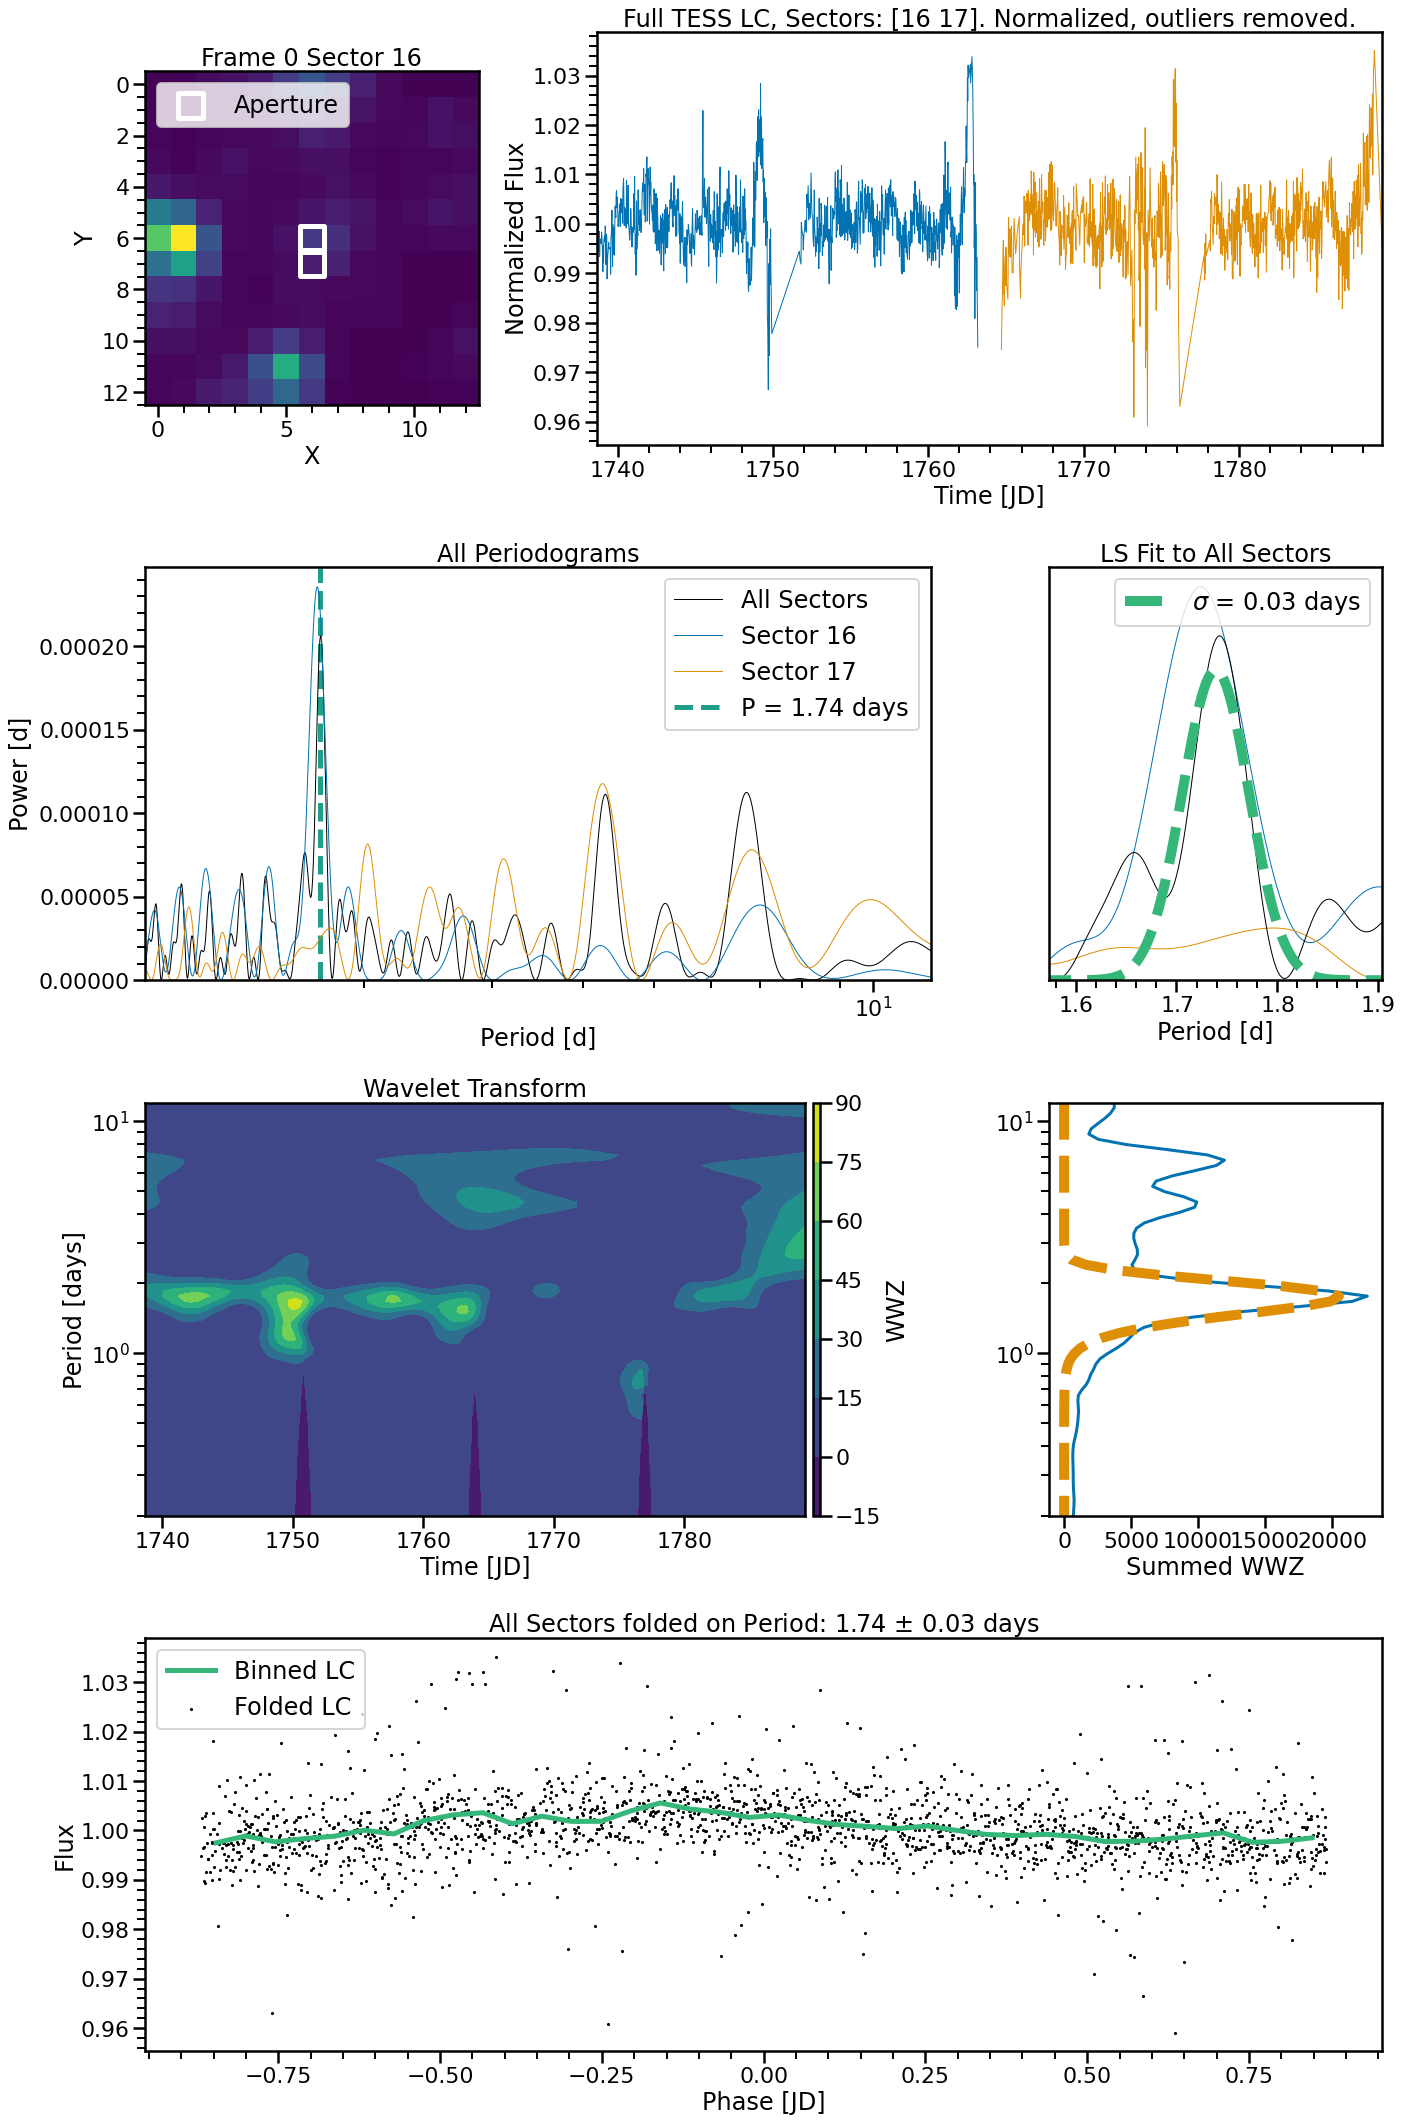

In [8]:
j.view()

Add sector lines, show wavelet collapse for individual sectors, put the wavelet collapse normally on the right and make it match the plot above.

In [9]:
j.results

,SLS,e_SLS,f_SLS,SW,e_SW
16,1.724311,0.047082,0.0,NaN,NaN
17,4.264723,0.198193,0.0,NaN,NaN
all,1.739086,0.033158,0.0,1.748376,0.292041


### Wavelet

- Improve Wavelet showcase
- Add uncertainty to likelihood
- Maybe add a "refine" option that reruns everything with more specific checks? No, this should be done in the first pass.

In [10]:
import numpy as np
w =  np.sum(j.void['wwz_all'], axis=1)
d = 1/j.void['wt_all'].nus

KeyError: 'wwz_all'

In [ ]:
def _gaussian_fn(p, mu, sigma, A):
    """
    Returns: A * exp(-(p - mu)^2 / (2.0 * sigma^2))
    """
    return A * np.exp(-(p - mu)**2 / (2.0 * sigma**2))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(d, w)
plt.plot(d,
        _gaussian_fn(d, *j.void['wavelet_popt_all']), ls='--', lw=10)

In [ ]:
plt.contourf(j.void['wt_all'].taus, 1./j.void['wt_all'].nus, j.void['wwz_all'])
plt.yscale('log')